In [1]:
import theano
import theano.tensor as T
import keras


Using gpu device 0: GeForce 940M (CNMeM is disabled, CuDNN not available)


In [ ]:
#print(theano.config)

In [ ]:
#np.distutils.__config__.show()

In [ ]:
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)
logistic([[0, 1], [-1, -2]])

In [ ]:
x = T.scalar('x',dtype='float64')
compute = theano.function([x], 2*x);
compute(10)


### dram-> vram / bottleneck

In [ ]:
x= T.scalar('x',dtype='float64')
compute = theano.function([x], 2*x**2)
compute(2)


### direct to gpu

In [ ]:
x_value = theano.shared(10.0)
compute = theano.function([], 2*x , givens={x:x_value})
compute()

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.cross_validation import train_test_split
from keras.layers import Convolution2D ,MaxPooling2D,Flatten
from keras.utils import np_utils
import pickle

Using Theano backend.
C:\Users\Back_jud\Anaconda2\lib\site-packages\theano\tensor\signal\downsample.py:6: UserWarning:

downsample module has been moved to the theano.tensor.signal.pool module.



In [ ]:
from keras import backend as K


In [8]:
a = open('d://labels.p')
b = open('d://images.p')
labels = np.array(pickle.load(a))
imgs = np.array(pickle.load(b))
imgs = imgs /255

In [9]:
labels = np_utils.to_categorical(labels,nb_classes=2)

In [10]:
x_tr,x_te,y_tr,y_te = train_test_split(imgs,labels,test_size= 0.2,random_state= 123)

In [ ]:
model1 = Sequential()
model1.add(Dense(50, input_dim=2500, activation="sigmoid", init='uniform'))
model1.add(Dense(2, activation="softmax", init='uniform'))
model1.compile(loss='categorical_crossentropy', optimizer=SGD())

In [ ]:
%time hist1 = model1.fit(np.array(x_tr), np.array(y_tr), nb_epoch=300, batch_size=15,show_accuracy=True)

In [ ]:
d= model1.get_weights()[0]

In [ ]:
d1

In [ ]:
plt.imshow(np.reshape(d[:,4],(50,50)),cmap='hot')

In [ ]:
model1.evaluate(np.array(x_te),np.array(y_te),batch_size=10,show_accuracy=True)

In [ ]:
model1.predict_classes(np.array(x_te),2)

In [ ]:
plt.plot(hist1.history['acc'])

In [11]:
#imgs for CNN
imgs2d= []
for img in imgs:
    imgs2d.append(np.reshape(img,(1,50,50)))
    

In [12]:
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(imgs2d,labels,test_size= 0.2,random_state= 123)

In [25]:
model2 = Sequential()
model2.add(Convolution2D(50,5, 5, border_mode='same', input_shape=(1, 50, 50)))
model2.add(Activation('relu'))
model2.add(Convolution2D(50, 5, 5,init='uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Convolution2D(100, 5, 5, border_mode='same'))
model2.add(Activation('relu'))
model2.add(Convolution2D(100, 5, 5,init='uniform'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(1250,init='uniform'))
model2.add(Activation('relu'))
model2.add(Dense(2,activation='softmax'))


model2.compile(loss='mse', optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True))

In [27]:
%time hist2 = model2.fit(np.array(x_tr2), y_tr2, nb_epoch=100 , batch_size=36 ,validation_split=0.2, show_accuracy=True , shuffle=True)

Train on 56 samples, validate on 15 samples
Epoch 1/100
56/56 [==============================] - 4s - loss: 0.3433 - acc: 0.5000 - val_loss: 0.2482 - val_acc: 0.5333
Epoch 2/100
56/56 [==============================] - 1s - loss: 0.2792 - acc: 0.6071 - val_loss: 0.6116 - val_acc: 0.3333
Epoch 3/100
56/56 [==============================] - 1s - loss: 0.3787 - acc: 0.6071 - val_loss: 0.6391 - val_acc: 0.3333
Epoch 4/100
56/56 [==============================] - 1s - loss: 0.3878 - acc: 0.6071 - val_loss: 0.6404 - val_acc: 0.3333
Epoch 5/100
56/56 [==============================] - 1s - loss: 0.3841 - acc: 0.6071 - val_loss: 0.6062 - val_acc: 0.3333
Epoch 6/100
56/56 [==============================] - 1s - loss: 0.3746 - acc: 0.6071 - val_loss: 0.4160 - val_acc: 0.3333
Epoch 7/100
56/56 [==============================] - 1s - loss: 0.2840 - acc: 0.6250 - val_loss: 0.1776 - val_acc: 0.8000
Epoch 8/100
56/56 [==============================] - 1s - loss: 0.1918 - acc: 0.7679 - val_loss: 0.167

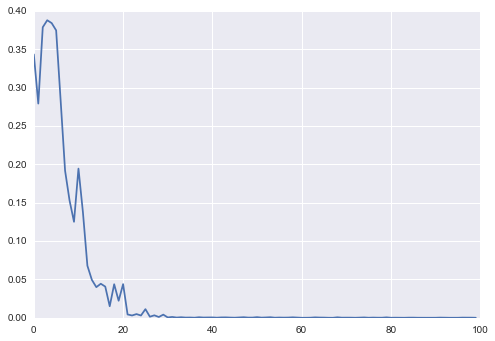

In [30]:
plt.plot(hist2.history['loss'])

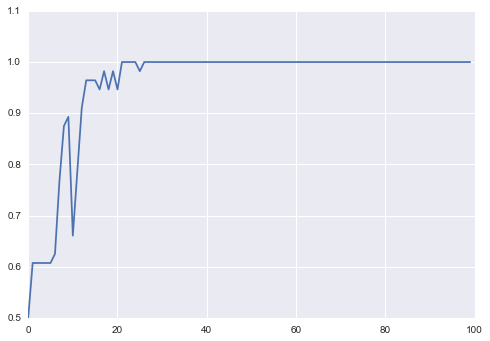

In [28]:
plt.plot(hist2.history['acc'])

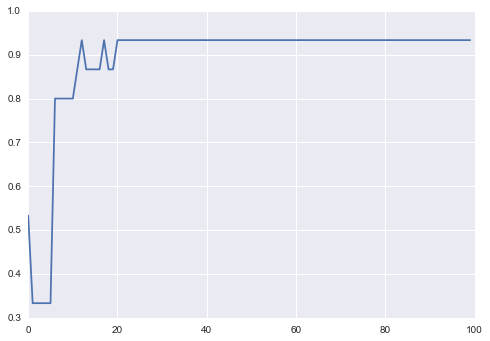

In [29]:
plt.plot(hist2.history['val_acc'])

In [31]:
from sklearn.metrics import classification_report

In [74]:
m2_wegh =  model2.get_weights()

In [95]:
model2.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 1, 50, 50)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
mod.cu

['nvcc', '-shared', '-O3', '--use-local-env', '--cl-version=2013', '-arch=sm_50', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=18715462c72ed6afcd7ca5d52813ce90,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-IC:\\Users\\Back_jud\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64\\cuda_ndarray', '-IC:\\Users\\Back_jud\\Anaconda2\\lib\\site-packages\\numpy\\core\\include', '-IC:\\Users\\Back_jud\\Anaconda2\\include', '-IC:\\Users\\Back_jud\\Anaconda2\\lib\\site-packages\\theano\\gof', '-IC:\\Users\\Back_jud\\Anacon

1 #include <Python.h>
2 #include <iostream>
3 #include "theano_mod_helper.h"
4 #include <math.h>
5 #include <numpy/arrayobject.h>
6 #include <numpy/arrayscalars.h>
7 #include "cuda_ndarray.cuh"
8 //////////////////////
9 ////  Support Code
10 //////////////////////
11 
12 
13     namespace {
14     struct __struct_compiled_op_afbaa7b36dd6451ec278a6e6338d23a7 {
15         PyObject* __ERROR;
16 
17         PyObject* storage_V3;
18 PyObject* storage_V1;
19         
20 
21         __struct_compiled_op_afbaa7b36dd6451ec278a6e6338d23a7() {
22             // This is only somewhat safe because we:
23             //  1) Are not a virtual class
24             //  2) Do not use any virtual classes in the members
25             //  3) Deal with mostly POD and pointers
26 
27             // If this changes, we would have to revise this, but for
28             // now I am tired of chasing segfaults because
29             // initialization code had an error and some pointer has
30             // a ju

Exception: ('The following error happened while compiling the node', Shape_i{3}(<CudaNdarrayType(float32, 4D)>), '\n', 'nvcc return status', 2, 'for cmd', 'nvcc -shared -O3 --use-local-env --cl-version=2013 -arch=sm_50 -Xlinker /DEBUG -D HAVE_ROUND -m64 -Xcompiler -DCUDA_NDARRAY_CUH=18715462c72ed6afcd7ca5d52813ce90,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD -IC:\\Users\\Back_jud\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64\\cuda_ndarray -IC:\\Users\\Back_jud\\Anaconda2\\lib\\site-packages\\numpy\\core\\include -IC:\\Users\\Back_jud\\Anaconda2\\include -IC:\\Users\\Back_jud\\Anaconda2\\lib\\site-packages\\theano\\gof -IC:\\Users\\Back_jud\\Anaconda2\\lib\\site-packages\\theano\\sandbox\\cuda -o C:\\Users\\Back_jud\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64\\tmpjk4iqe\\afbaa7b36dd6451ec278a6e6338d23a7.pyd mod.cu -LC:\\Users\\Back_jud\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.10586-Intel64_Family_6_Model_60_Stepping_3_GenuineIntel-2.7.11-64\\cuda_ndarray -LC:\\Users\\Back_jud\\Anaconda2\\libs -LC:\\Users\\Back_jud\\Anaconda2 -lcudart -lcublas -lcuda_ndarray -lpython27', '[Shape_i{3}(<CudaNdarrayType(float32, 4D)>)]')

In [90]:
for a in m2_wegh:
    print(len(a))

50
50
50
50
100
100
100
100
8100
1250
1250
2


In [47]:
model2.evaluate(np.array(x_te2),y_te2,batch_size=15)

18/18 [==============================] - 2s     


0.016039947513490915

In [51]:
y_pred = model2.predict_classes(np.array(x_te2))

18/18 [==============================] - 0s


In [49]:
model2.predict(np.array(x_te2))

array([[  3.86535539e-04,   9.99613464e-01],
       [  8.93316686e-01,   1.06683373e-01],
       [  9.99076009e-01,   9.24003369e-04],
       [  2.07914763e-05,   9.99979258e-01],
       [  5.22629416e-04,   9.99477446e-01],
       [  1.07258469e-01,   8.92741501e-01],
       [  9.99984503e-01,   1.55043981e-05],
       [  9.99969482e-01,   3.05326139e-05],
       [  9.99964237e-01,   3.57967219e-05],
       [  4.16437425e-02,   9.58356202e-01],
       [  4.18149773e-03,   9.95818555e-01],
       [  1.36993898e-04,   9.99863029e-01],
       [  8.63590956e-01,   1.36409059e-01],
       [  9.96400952e-01,   3.59898806e-03],
       [  3.46035957e-01,   6.53964102e-01],
       [  9.28506553e-01,   7.14935213e-02],
       [  9.94307935e-01,   5.69211086e-03],
       [  6.52760267e-01,   3.47239673e-01]])

In [69]:
y_ten = [0 if s[0] else 1 for s in y_te]

In [70]:
cr = classification_report(y_ten,y_pred)

In [72]:
print(cr)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        18



In [ ]:
!start c:\users\back_jud\anaconda2\lib\site-packages\keras\layers\